#**Predicting passenger survival on the Titanic**

###Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import learning_curve

###Loading the Dataset

In [4]:
data = pd.read_csv("dataset.csv")

####Visualizing Data

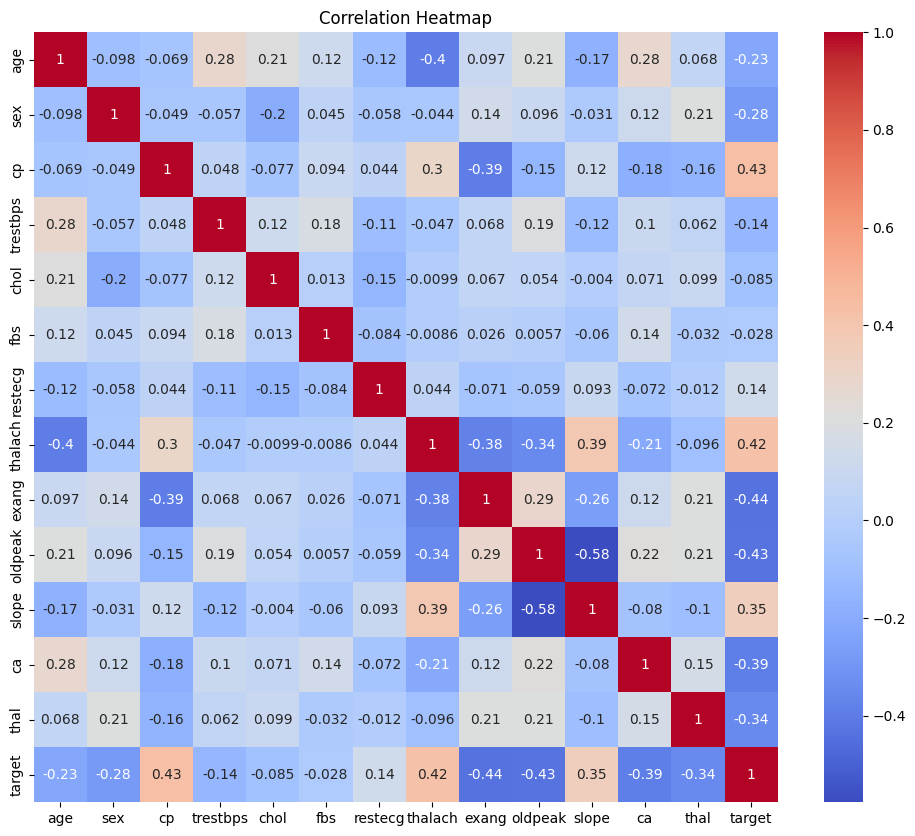

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

####Distributing Features

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

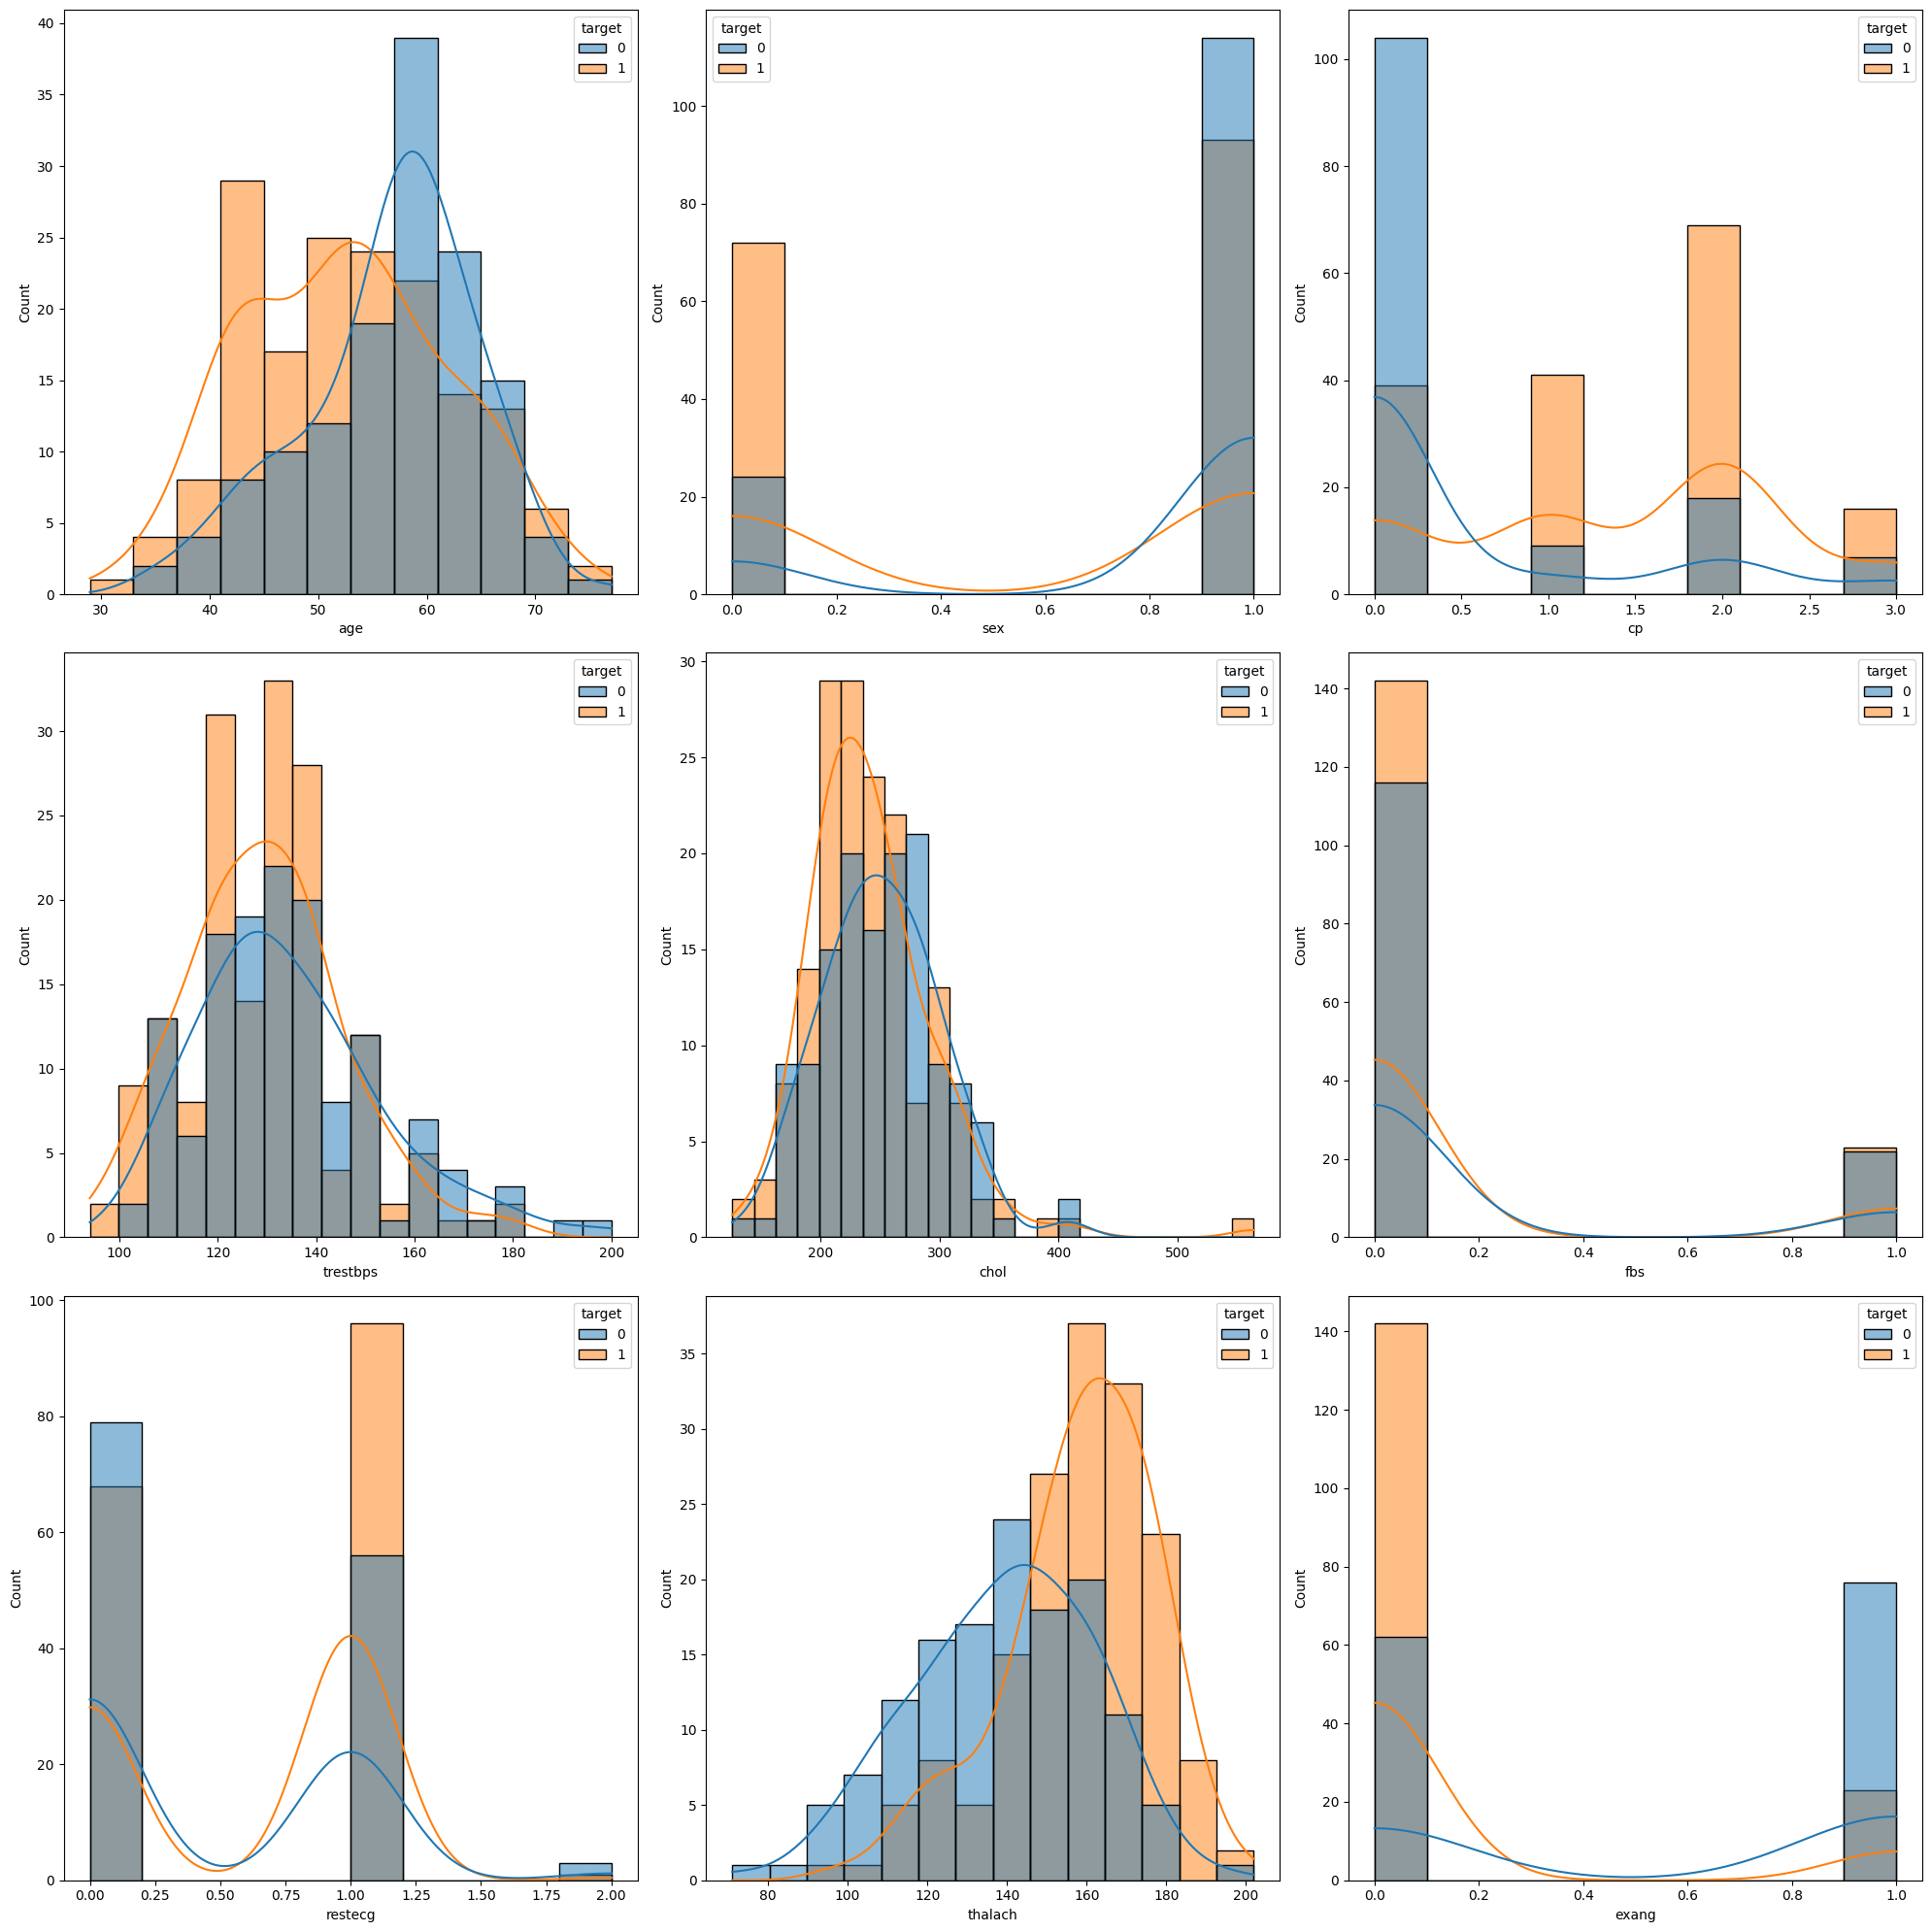

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, column in enumerate(data.columns[:9]):
    sns.histplot(data=data, x=column, hue='target', kde=True, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

###Preparing the data

In [7]:

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

###Spliting Data


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Imputing missing values

In [9]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

###Feature scaling


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Training the model

In [12]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

###Evaluating Model

In [13]:
# Predict and evaluate
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [14]:
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[25  4]
 [ 5 27]]

Accuracy: 85.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



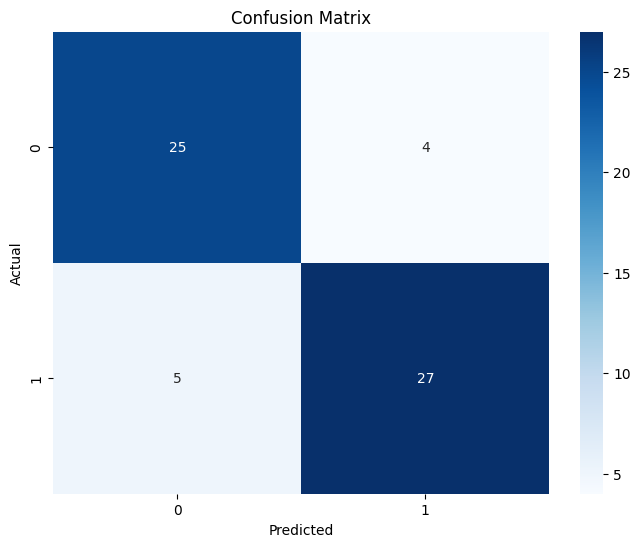

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

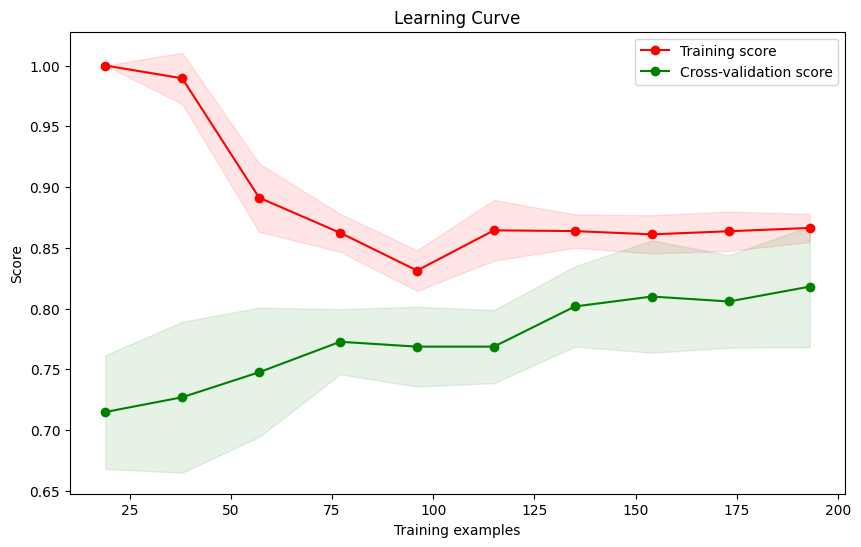

In [18]:
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

In [19]:
from sklearn.utils import resample

In [20]:
# Separate majority and minority classes
df_majority = data[data.target==1]
df_minority = data[data.target==0]

In [21]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

In [22]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [23]:
# Display new class counts
print(df_upsampled.target.value_counts())

target
1    165
0    165
Name: count, dtype: int64


In [24]:
# Separate features and target
X_new = df_upsampled.iloc[:, :-1].values
y_new = df_upsampled.iloc[:, -1].values

In [25]:
# Split the new data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [26]:
# Impute, scale, and train on new data
X_train_new = imputer.fit_transform(X_train_new)
X_test_new = imputer.transform(X_test_new)
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

In [27]:
classifier_new = LogisticRegression(random_state=42)
classifier_new.fit(X_train_new, y_train_new)

LogisticRegression(random_state=42)

In [28]:
# Evaluate new model
y_pred_new = classifier_new.predict(X_test_new)
cm_new = confusion_matrix(y_test_new, y_pred_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)

In [29]:

print("\nNew Model Results:")
print("Confusion Matrix:")
print(cm_new)
print(f"\nAccuracy: {accuracy_new*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_new))


New Model Results:
Confusion Matrix:
[[22 10]
 [ 4 30]]

Accuracy: 78.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.75      0.88      0.81        34

    accuracy                           0.79        66
   macro avg       0.80      0.78      0.78        66
weighted avg       0.80      0.79      0.79        66



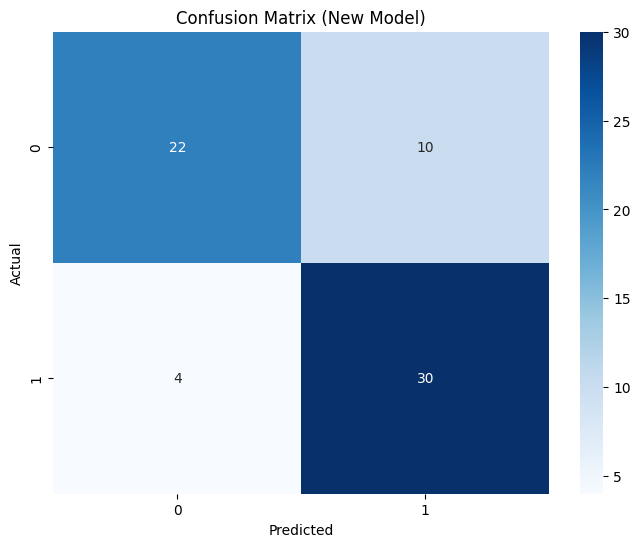

In [30]:
# Visualize new confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (New Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()